## Задание 0 [25 баллов]
Найти категорию трат, где в течение года по дням был максимальный разброс значений «сумм транзакций» (значения из таблиц)
Найти категорию трат, где в течение года по дням был максимальный разброс значений «количества транзакций» (значения из таблиц)

Визуализируйте свои выводы в удобном для понимания формате.

In [164]:
import pandas as pd
import datetime as dt
import matplotlib

def name(s):
    return s[:len(s)-2]

df = pd.read_excel('dynamics.xlsx', sheet_name='по дням')
df.drop(labels=None, axis=0, index=0, columns=None, level=None, inplace=False, errors='raise') 
print(df.columns)
border = dt.datetime(2020, 1, 1, 0, 0)
df = df.drop(labels=None, axis=0, index=0, columns=None, level=None, inplace=False, errors='raise')
df['время'] = pd.to_datetime(df['категория'])
df = df.drop(columns = ['категория'],axis = 1)
df[df['время'] <= border]

l = len(df.columns) - 1
l = l//3

x_sum = df.iloc[:, 0:l].std()
x_num = df.iloc[:, l:2*l].std()

x_sum = x_sum.sort_values(ascending=False)
x_num = x_num.sort_values(ascending=False)


names = list(x_num.index)
x_num.index = map(name, names)

Index(['категория', 'авиабилеты', 'автосервис', 'аптеки', 'бары',
       'дом, ремонт', 'доставка еды', 'другое', 'ж/д билеты', 'зоомагазины',
       'кафе, рестораны', 'кинотеатры', 'красота', 'обувь, одежда', 'отели',
       'развлечения', 'супермаркеты', 'театры', 'топливо', 'транспорт', 'туры',
       'фастфуд', 'фитнес', 'авиабилеты.1', 'автосервис.1', 'аптеки.1',
       'бары.1', 'дом, ремонт.1', 'доставка еды.1', 'другое.1', 'ж/д билеты.1',
       'зоомагазины.1', 'кафе, рестораны.1', 'кинотеатры.1', 'красота.1',
       'обувь, одежда.1', 'отели.1', 'развлечения.1', 'супермаркеты.1',
       'театры.1', 'топливо.1', 'транспорт.1', 'туры.1', 'фастфуд.1',
       'фитнес.1', 'авиабилеты.2', 'автосервис.2', 'аптеки.2', 'бары.2',
       'дом, ремонт.2', 'доставка еды.2', 'другое.2', 'ж/д билеты.2',
       'зоомагазины.2', 'кафе, рестораны.2', 'кинотеатры.2', 'красота.2',
       'обувь, одежда.2', 'отели.2', 'развлечения.2', 'супермаркеты.2',
       'театры.2', 'топливо.2', 'транспорт.

<AxesSubplot: >

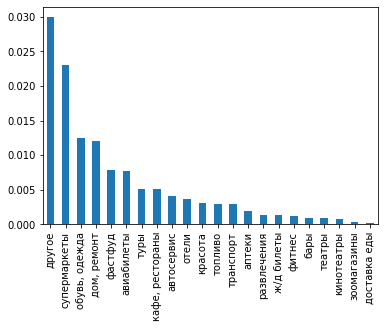

In [165]:
x_sum.plot(kind="bar")

<AxesSubplot: >

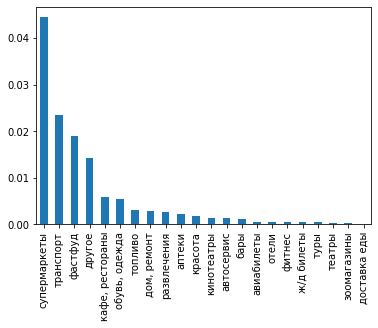

In [166]:
x_num.plot(kind="bar")

# Задание 1 [25 баллов]
Найти категории трат в разбивке по неделям, между количеством транзакций которых была наибольшая корреляция  

Результат предоставьте в формате графика, отражающего общие корреляции всех категорий по неделям (график данного типа изучали на лекции)  

По графику сделайте 3 вывода относительно корреляций категорий   

**Например:** покупка авиабилетов коррелирует с покупкой в супермаркетах, потому что… (тут делаем предположения почему так может быть)

C:\Users\mikha\AppData\Local\Temp\ipykernel_9284\2537980982.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_num.corr(), linewidths= .3)


<AxesSubplot: >

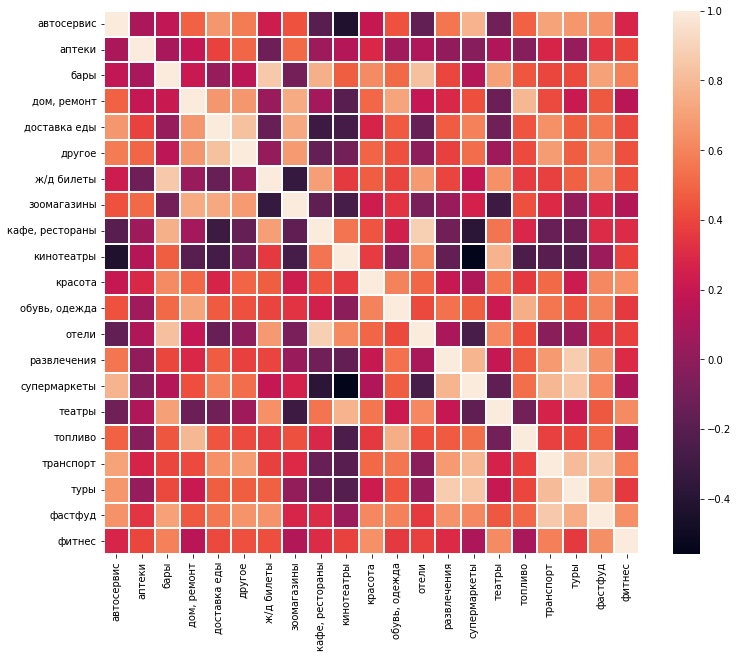

In [167]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

def name(s):
    return s[:len(s)-2]

df = pd.read_excel('dynamics.xlsx', sheet_name='по неделям')
df = df.drop(labels=None, axis=0, index=0, columns=None, level=None, inplace=False, errors='raise')

df['время'] = pd.to_datetime(df['категория'])
df = df.drop(columns = ['категория'],axis = 1)
l = len(df.columns) - 1
l = l//3


x_num = df.iloc[:, l:2*l]
names = list(x_num.columns)
x_num.columns = map(name, names) 

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(x_num.corr(), linewidths= .3) 



Из диаграммы видно, что сильнее всего коррелируют пары: 
* отели - кафе, рестораны 
* развлечения - туры 
* супермаркеты - туры 
* транспорт - фастфуд

Хуже всего коррелируют пары: 
* автосервис - кинотеатры 
* ж/д билеты - зоомагазины 
* кинотеатры - супермаркеты


## Задание 2 [50 баллов] 
Проверьте, как отразились на покупках в различных категориях следующие события:
* Принятие коронавирусных мер
* Праздники
* Сезонность

Для этого проверьте следующие гипотезы:
* Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер уменьшилось
* В предновогодний период средний чек вырос
* Весной траты в категории фитнес растут

In [168]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

def name(s):
    return s[:len(s)-2]

df = pd.read_excel('dynamics.xlsx', sheet_name='по неделям')
df = df.drop(labels=None, axis=0, index=0, columns=None, level=None, inplace=False, errors='raise')

df['время'] = pd.to_datetime(df['категория'])
df = df.drop(columns = ['категория'],axis = 1)
l = len(df.columns) - 1
l = l//3


x_num = df.iloc[:, l:2*l]
names = list(x_num.columns)
x_num.columns = map(name, names) 
x_num['дата'] = df['время'] 
print(x_num.columns)


Index(['авиабилеты', 'автосервис', 'аптеки', 'бары', 'дом, ремонт',
       'доставка еды', 'другое', 'ж/д билеты', 'зоомагазины',
       'кафе, рестораны', 'кинотеатры', 'красота', 'обувь, одежда', 'отели',
       'развлечения', 'супермаркеты', 'театры', 'топливо', 'транспорт', 'туры',
       'фастфуд', 'фитнес', 'дата'],
      dtype='object')


### Количество транзакций в барах/кафе и ресторанах/отелях после принятия коронавирусных мер

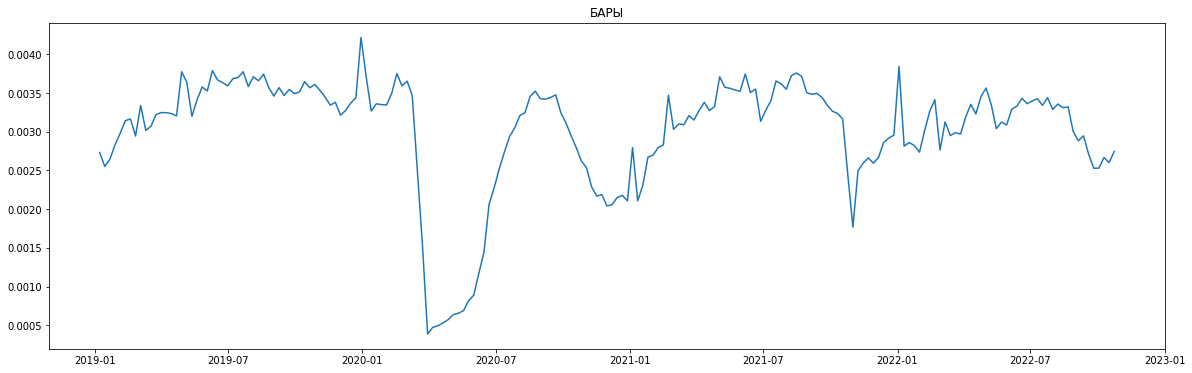

In [169]:
plt.figure(figsize=(20,6))
plt.title('БАРЫ')
plt.plot(x_num['дата'].iloc[0:], x_num['бары'].iloc[0:])

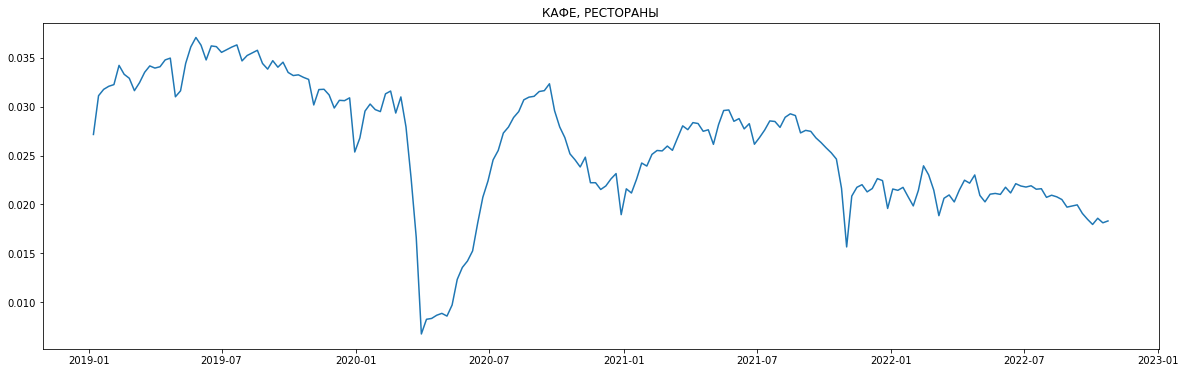

In [170]:
plt.figure(figsize=(20,6))
plt.title('КАФЕ, РЕСТОРАНЫ')
plt.plot(x_num['дата'].iloc[0:], x_num['кафе, рестораны'].iloc[0:])

In [171]:
x_cheque = df.iloc[:, 2*l:3*l]
names = list(x_cheque.columns)
x_cheque.columns = map(name, names) 
x_cheque['дата'] = df['время'] 
print(x_cheque.columns)

Index(['авиабилеты', 'автосервис', 'аптеки', 'бары', 'дом, ремонт',
       'доставка еды', 'другое', 'ж/д билеты', 'зоомагазины',
       'кафе, рестораны', 'кинотеатры', 'красота', 'обувь, одежда', 'отели',
       'развлечения', 'супермаркеты', 'театры', 'топливо', 'транспорт', 'туры',
       'фастфуд', 'фитнес', 'дата'],
      dtype='object')


### В предновогодний период средний чек вырос
В представленных ниже графиках можно наблюдать рост среднего чека в предновогодний период в категориях "супермаркеты" и "доставка еды"

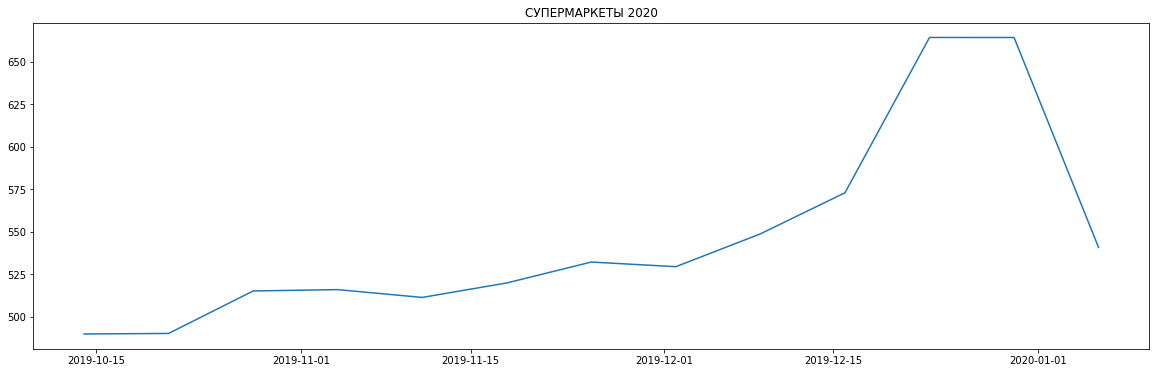

In [172]:
plt.figure(figsize=(20,6))
plt.title('СУПЕРМАРКЕТЫ 2020')
plt.plot(x_cheque['дата'].iloc[40:53], x_cheque['супермаркеты'].iloc[40:53])

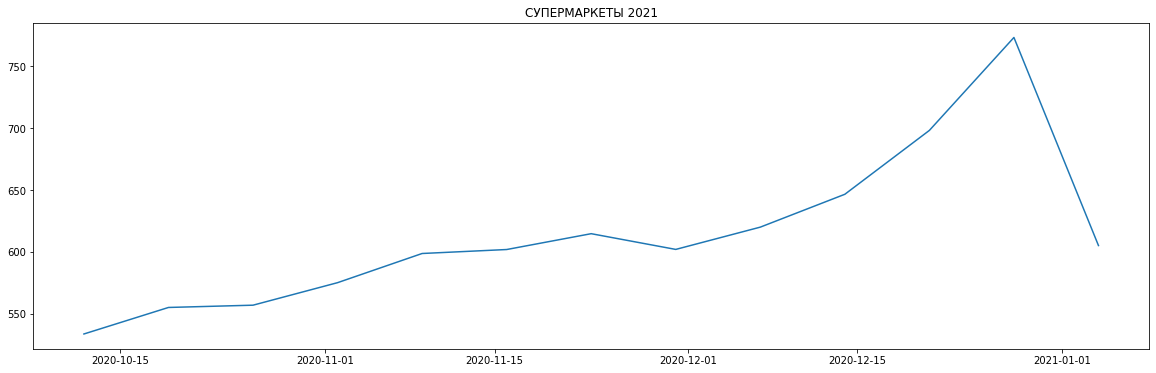

In [173]:
plt.figure(figsize=(20,6))
plt.title('СУПЕРМАРКЕТЫ 2021')
plt.plot(x_cheque['дата'].iloc[92:105], x_cheque['супермаркеты'].iloc[92:105])

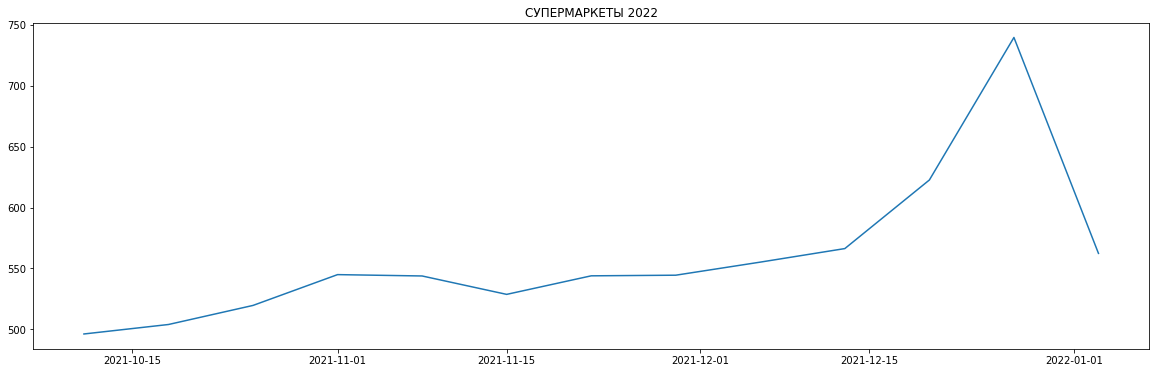

In [174]:
plt.figure(figsize=(20,6))
plt.title('СУПЕРМАРКЕТЫ 2022')
plt.plot(x_cheque['дата'].iloc[144:157], x_cheque['супермаркеты'].iloc[144:157])

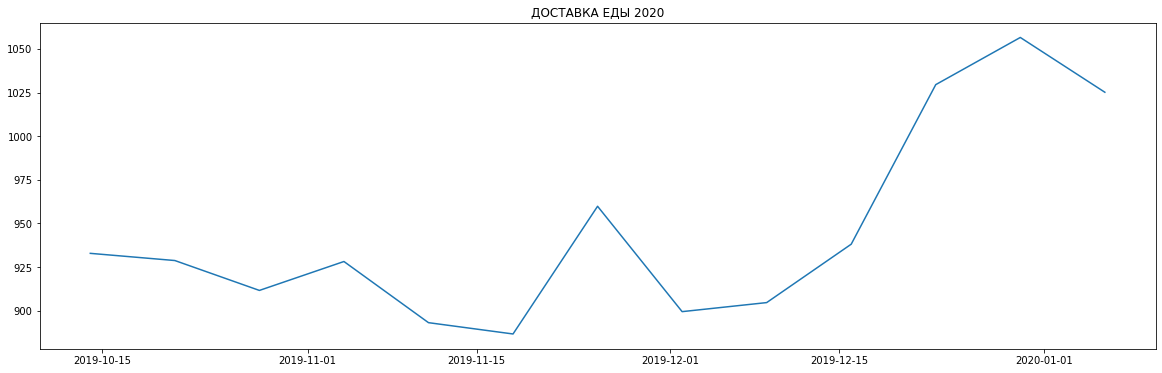

In [175]:
plt.figure(figsize=(20,6))
plt.title('ДОСТАВКА ЕДЫ 2020')
plt.plot(x_cheque['дата'].iloc[40:53], x_cheque['доставка еды'].iloc[40:53])

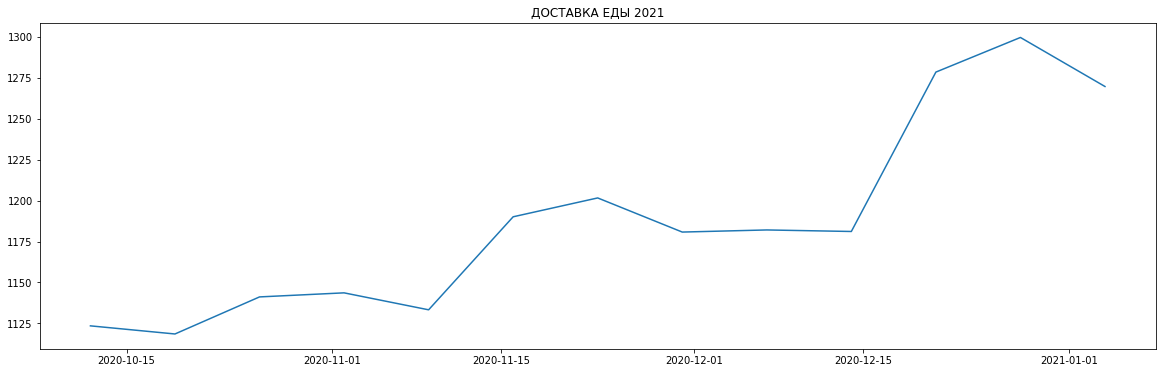

In [176]:
plt.figure(figsize=(20,6))
plt.title('ДОСТАВКА ЕДЫ 2021')
plt.plot(x_cheque['дата'].iloc[92:105], x_cheque['доставка еды'].iloc[92:105])

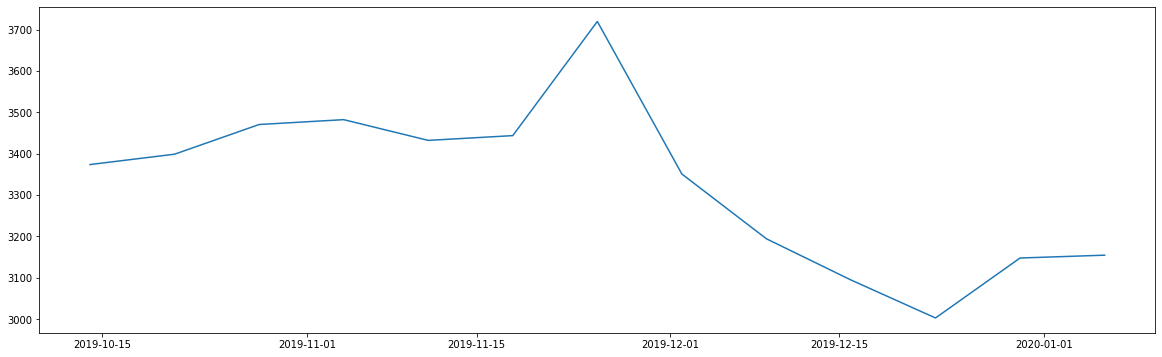

In [177]:
plt.figure(figsize=(20,6))
plt.plot(x_cheque['дата'].iloc[40:53], x_cheque['обувь, одежда'].iloc[40:53])

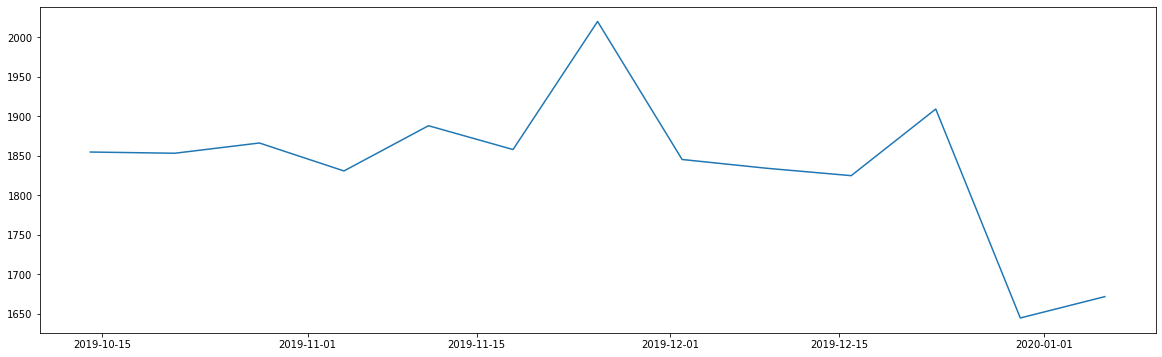

In [178]:
plt.figure(figsize=(20,6))
plt.plot(x_cheque['дата'].iloc[40:53], x_cheque['другое'].iloc[40:53])

### Весной траты в категории фитнес растут
Рост трат в категории фитнес весной наблюдается лишь в 2020 году, а в 2019 и 2022 годах весна не особо выделяется относительно года в целом

In [179]:
x_fit = df.iloc[:, l:2*l]
names = list(x_fit.columns)
x_fit.columns = map(name, names) 
x_fit['дата'] = df['время']

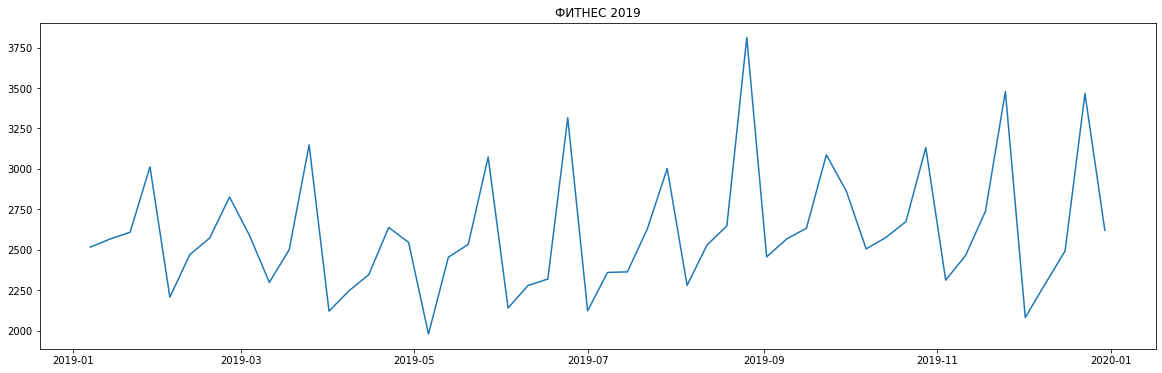

In [180]:
plt.figure(figsize=(20,6))
plt.title('ФИТНЕС 2019')
plt.plot(x_cheque['дата'].iloc[0:52], x_cheque['фитнес'].iloc[0:52])

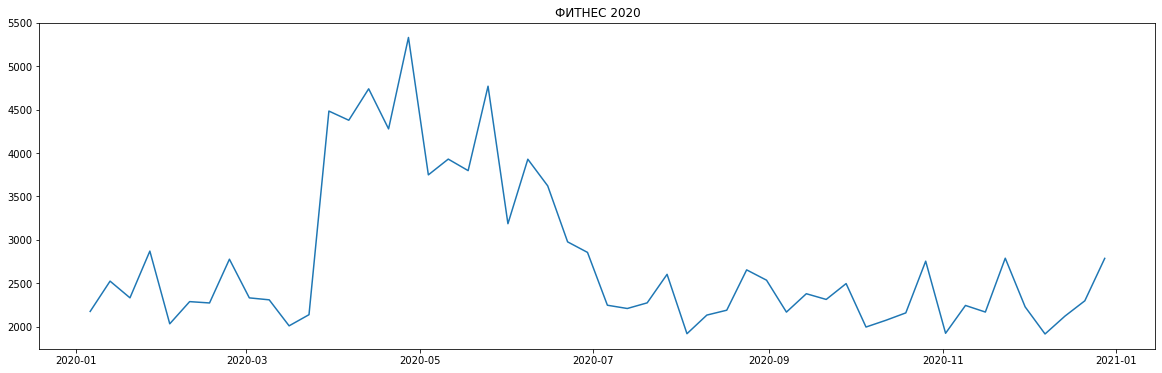

In [181]:
plt.figure(figsize=(20,6))
plt.title('ФИТНЕС 2020')
plt.plot(x_cheque['дата'].iloc[52:104], x_cheque['фитнес'].iloc[52:104])

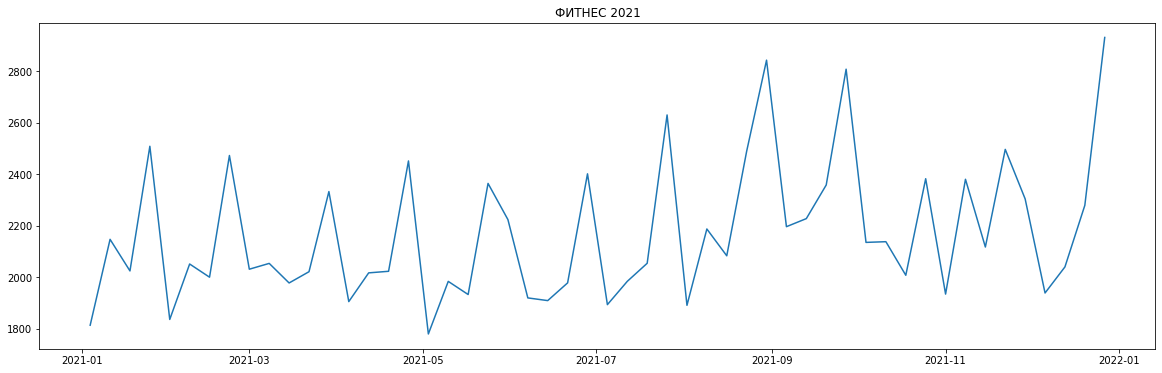

In [182]:
plt.figure(figsize=(20,6))
plt.title('ФИТНЕС 2021')
plt.plot(x_cheque['дата'].iloc[104:156], x_cheque['фитнес'].iloc[104:156])

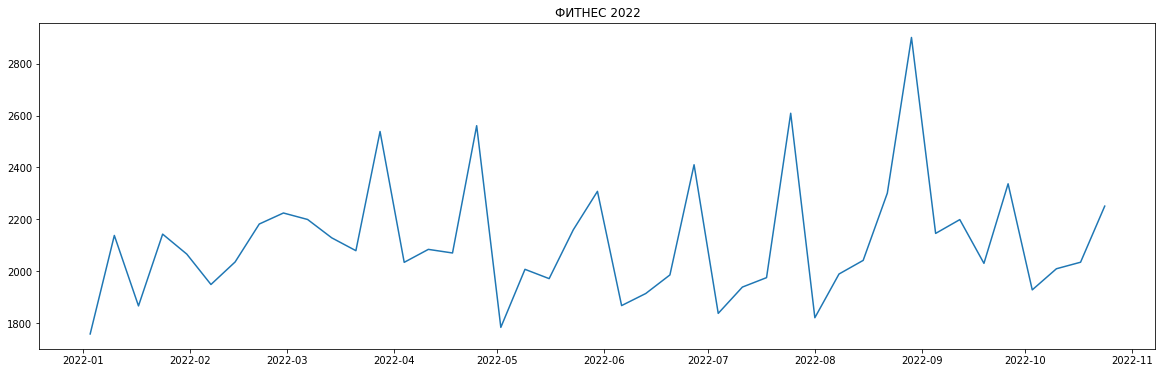

In [183]:
plt.figure(figsize=(20,6))
plt.title('ФИТНЕС 2022')
plt.plot(x_cheque['дата'].iloc[156:], x_cheque['фитнес'].iloc[156:])

In [184]:
x_chequef = df.iloc[:, 2*l:3*l]
names = list(x_chequef.columns)
x_chequef.columns = map(name, names) 
x_chequef['дата'] = df['время'] 

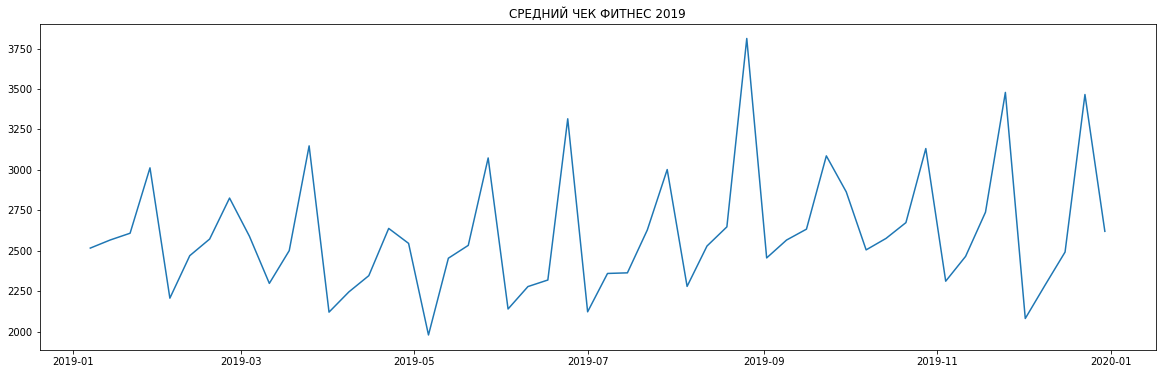

In [185]:
plt.figure(figsize=(20,6))
plt.title('СРЕДНИЙ ЧЕК ФИТНЕС 2019')
plt.plot(x_chequef['дата'].iloc[0:52], x_chequef['фитнес'].iloc[0:52])

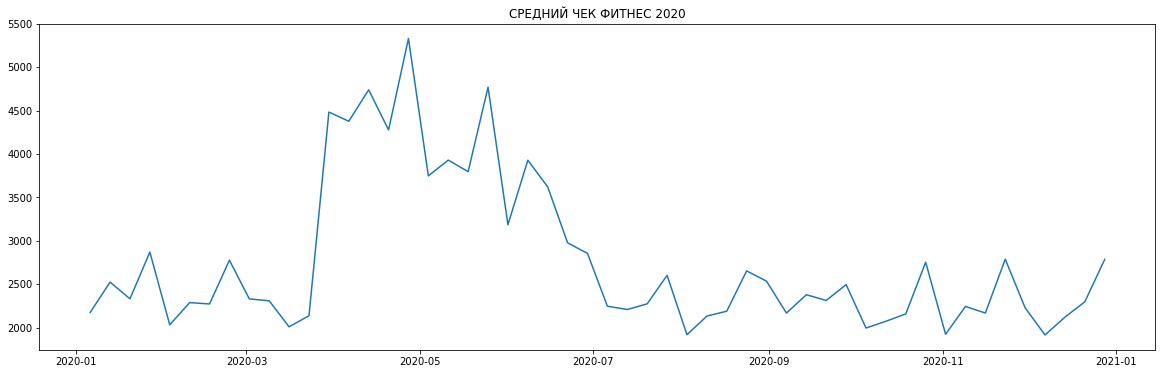

In [186]:
plt.figure(figsize=(20,6))
plt.title('СРЕДНИЙ ЧЕК ФИТНЕС 2020')
plt.plot(x_chequef['дата'].iloc[52:104], x_chequef['фитнес'].iloc[52:104])

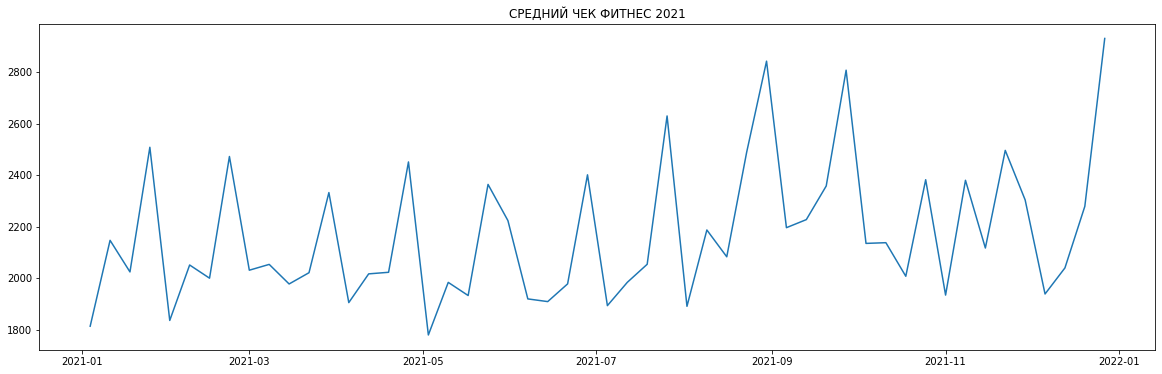

In [187]:
plt.figure(figsize=(20,6))
plt.title('СРЕДНИЙ ЧЕК ФИТНЕС 2021')
plt.plot(x_chequef['дата'].iloc[104:156], x_chequef['фитнес'].iloc[104:156])

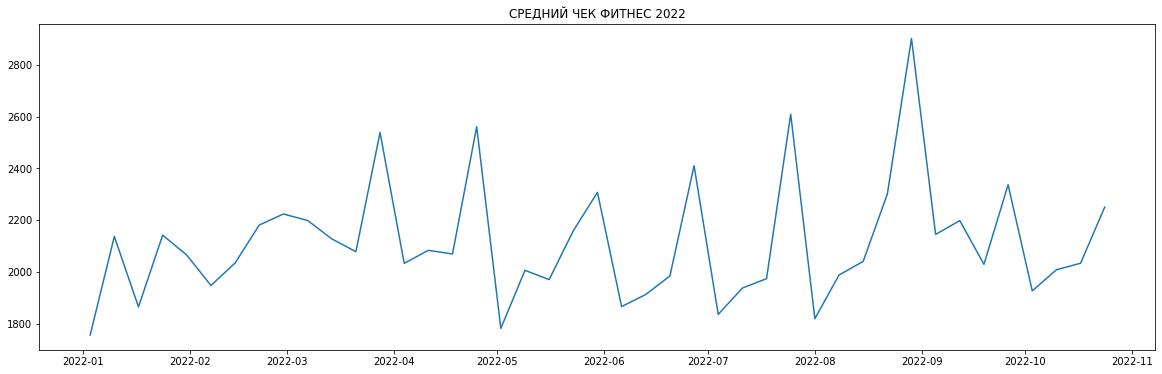

In [188]:
plt.figure(figsize=(20,6))
plt.title('СРЕДНИЙ ЧЕК ФИТНЕС 2022')
plt.plot(x_chequef['дата'].iloc[156:], x_chequef['фитнес'].iloc[156:])

### Авиабилеты

In [201]:
x_avia = df.iloc[:, 0:l]
#names = list(x_avia.columns)
#x_avia.columns = map(name, names) 
x_avia['дата'] = df['время']

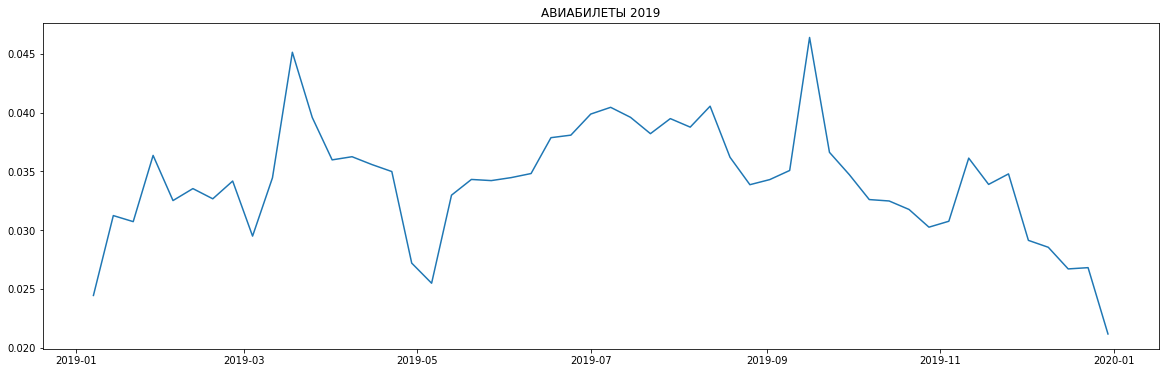

In [202]:
plt.figure(figsize=(20,6))
plt.title('АВИАБИЛЕТЫ 2019')
plt.plot(x_avia['дата'].iloc[0:52], x_avia['авиабилеты'].iloc[0:52])

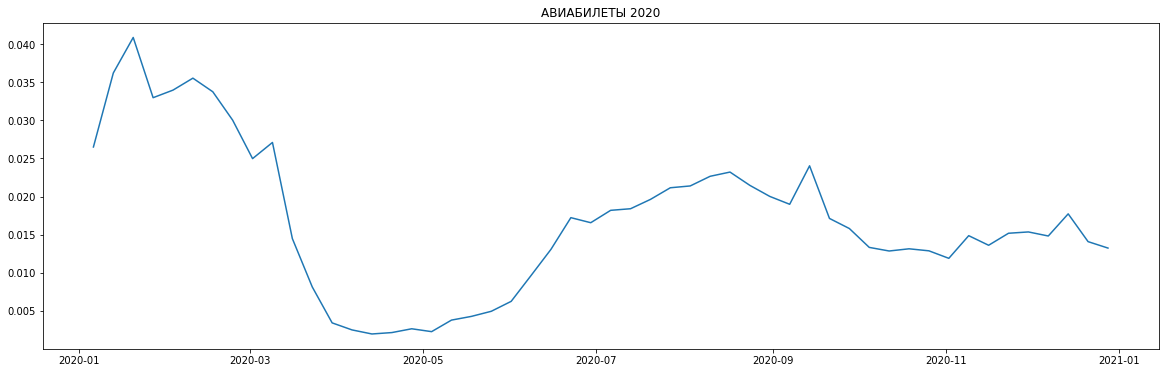

In [203]:
plt.figure(figsize=(20,6))
plt.title('АВИАБИЛЕТЫ 2020')
plt.plot(x_avia['дата'].iloc[52:104], x_avia['авиабилеты'].iloc[52:104])

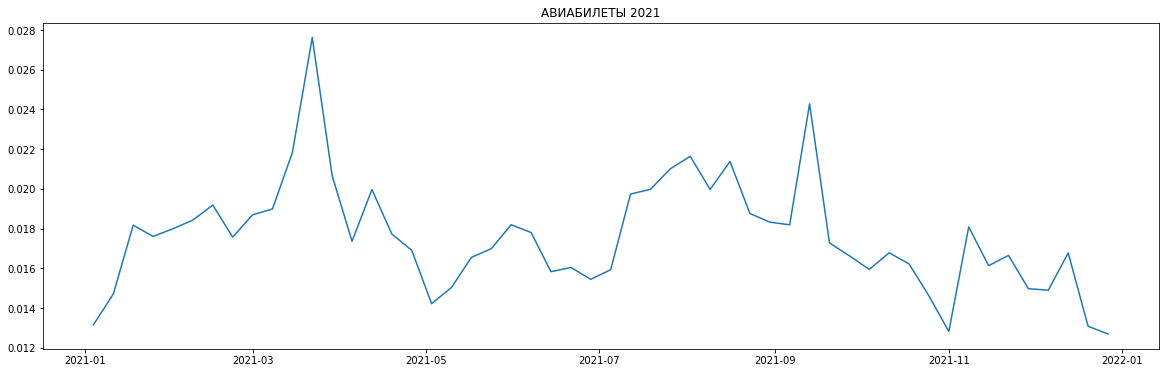

In [204]:
plt.figure(figsize=(20,6))
plt.title('АВИАБИЛЕТЫ 2021')
plt.plot(x_avia['дата'].iloc[104:156], x_avia['авиабилеты'].iloc[104:156])

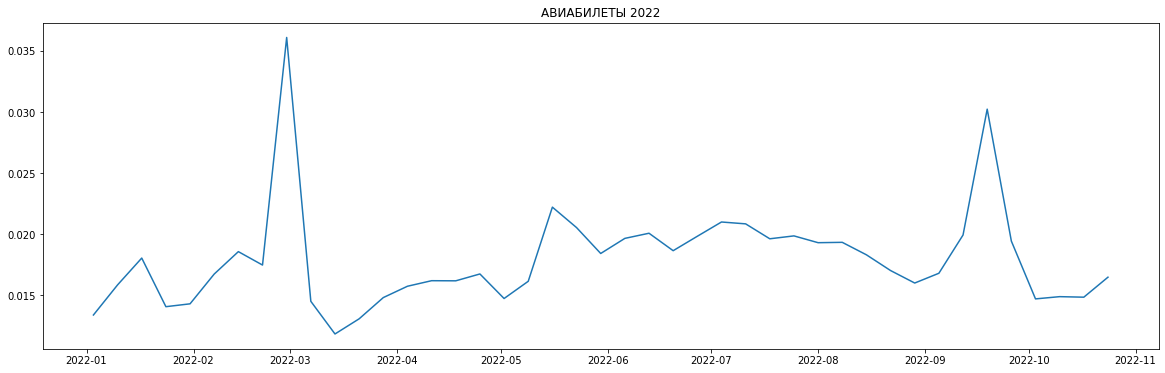

In [205]:
plt.figure(figsize=(20,6))
plt.title('АВИАБИЛЕТЫ 2022')
plt.plot(x_avia['дата'].iloc[156:], x_avia['авиабилеты'].iloc[156:])